This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


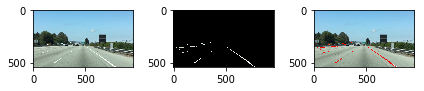

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)
thresholds = [200,200,200]
image_copy1 = np.copy(image)
image_copy2 = np.copy(image)
out1 = (image_copy1[:,:,0] < thresholds[0]) | (image_copy1[:,:,1] < thresholds[1]) | (image_copy1[:,:,2] < thresholds[2])
image_xsize = image.shape[1]
image_ysize = image.shape[0]
left_bottom = [3*image_xsize/8,3*image_ysize/10]
right_bottom = [6*image_xsize/8,5*image_ysize/10]
apex = [image_xsize/2,image_ysize/2]
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)
xx , yy = np.meshgrid(np.arange(0,image_xsize),np.arange(0,image_ysize))
out2 = (yy > xx * fit_left[0] + fit_left[1]) & (yy > xx * fit_right[0] + fit_right[1]) & (yy > xx * fit_bottom[0] + fit_bottom[1])
image_copy1[out1 | ~out2] = [0,0,0]
image_copy2[out2 & ~out1] = [255,0,0]
fig = plt.figure()
axes1 = fig.add_subplot(1,3,1)
axes1.imshow(image)
axes2 = fig.add_subplot(1,3,2)
axes2.imshow(image_copy1)
axes3 = fig.add_subplot(1,3,3)
axes3.imshow(image_copy2)
plt.tight_layout()